In [2]:
import torch
from torch.utils.data import DataLoader
from torchvision.transforms.v2 import ToTensor
from torchvision.datasets import FashionMNIST

In [3]:
# 加载数据到数据集
train_data=FashionMNIST(root='./fashion_data', train=True, download=True, transform=ToTensor())
test_data=FashionMNIST(root='./fashion_data', train=False, download=True, transform=ToTensor())

D:\work\conda\envs\nanyang\Lib\site-packages\torchvision\transforms\v2\_deprecated.py:42: UserWarning: The transform `ToTensor()` is deprecated and will be removed in a future release. Instead, please use `v2.Compose([v2.ToImage(), v2.ToDtype(torch.float32, scale=True)])`.Output is equivalent up to float precision.
  warnings.warn(


In [4]:
train_data 

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: ./fashion_data
    Split: Train
    StandardTransform
Transform: ToTensor()

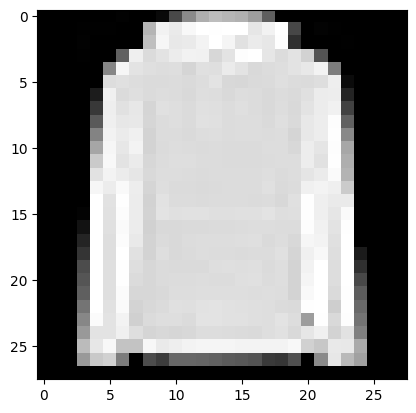

In [5]:
import matplotlib.pyplot as plt
img, clz = train_data[12301]
img = img.reshape(28,28)
plt.imshow(img,cmap="gray")
plt.show()

In [6]:
labels = set([clz for img,clz in train_data])
labels

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [7]:
import torch.nn as nn

In [8]:
# X输入 shape(,784)
# 隐藏层 shape(784,64) 参数矩阵
# 隐藏层 shape(64,) 偏执bias
# 输出层 shape(64,10) 参数矩阵
# 输出层 shape(10,) 偏执bias
# Y输出 shape(,10)

In [9]:
linear = nn.Linear(in_features=28*28,out_features=64,bias=True)
# 激活层
activation = nn.Sigmoid()
# 输出层
linear2 = nn.Linear(in_features=64,out_features=10,bias=True)

x = torch.rand(10,28*28)
out1 = linear(x)
out2 = activation(out1)
out3 = linear2(out2)
softmax = nn.Softmax(dim=1)
final =  softmax(out3)
print(final)
print(out3.shape)

tensor([[0.1372, 0.0632, 0.0825, 0.1099, 0.1203, 0.1115, 0.0476, 0.1280, 0.0579,
         0.1419],
        [0.1373, 0.0605, 0.0841, 0.1088, 0.1187, 0.1121, 0.0483, 0.1328, 0.0574,
         0.1400],
        [0.1326, 0.0645, 0.0838, 0.1115, 0.1175, 0.1121, 0.0482, 0.1325, 0.0589,
         0.1384],
        [0.1318, 0.0642, 0.0817, 0.1160, 0.1217, 0.1117, 0.0483, 0.1321, 0.0583,
         0.1342],
        [0.1377, 0.0631, 0.0852, 0.1111, 0.1172, 0.1116, 0.0470, 0.1311, 0.0560,
         0.1400],
        [0.1431, 0.0623, 0.0795, 0.1044, 0.1228, 0.1126, 0.0470, 0.1313, 0.0576,
         0.1393],
        [0.1397, 0.0644, 0.0821, 0.1070, 0.1268, 0.1088, 0.0490, 0.1311, 0.0588,
         0.1324],
        [0.1370, 0.0624, 0.0829, 0.1065, 0.1225, 0.1128, 0.0483, 0.1315, 0.0590,
         0.1371],
        [0.1368, 0.0639, 0.0827, 0.1103, 0.1260, 0.1125, 0.0473, 0.1298, 0.0573,
         0.1333],
        [0.1350, 0.0640, 0.0824, 0.1081, 0.1235, 0.1128, 0.0487, 0.1313, 0.0586,
         0.1356]], grad_fn=<

In [10]:
# 所有结构串联
model = nn.Sequential(nn.Linear(784,64),nn.Sigmoid(),nn.Linear(64,10))


In [11]:
loss_fn = nn.CrossEntropyLoss #交叉熵损失函数
optimizer = torch.optim.SGD(model.parameters(),lr=0.01)
[param for param in model.parameters()]

[Parameter containing:
 tensor([[-0.0072, -0.0132,  0.0340,  ..., -0.0116, -0.0104,  0.0197],
         [ 0.0215, -0.0081, -0.0033,  ...,  0.0119, -0.0065, -0.0315],
         [-0.0243, -0.0302, -0.0230,  ...,  0.0346,  0.0200,  0.0116],
         ...,
         [-0.0182, -0.0210, -0.0203,  ...,  0.0033,  0.0249,  0.0336],
         [-0.0338, -0.0165,  0.0340,  ...,  0.0077, -0.0298, -0.0289],
         [ 0.0328, -0.0279, -0.0249,  ...,  0.0157,  0.0193,  0.0334]],
        requires_grad=True),
 Parameter containing:
 tensor([ 0.0071,  0.0096,  0.0097,  0.0136, -0.0269, -0.0039, -0.0134, -0.0229,
         -0.0147, -0.0025, -0.0262, -0.0201,  0.0157, -0.0348,  0.0116, -0.0328,
         -0.0277,  0.0249,  0.0309,  0.0003,  0.0039, -0.0279,  0.0296,  0.0335,
         -0.0190,  0.0327,  0.0057,  0.0197, -0.0061,  0.0105, -0.0309,  0.0041,
         -0.0265, -0.0310, -0.0286, -0.0182,  0.0145, -0.0092, -0.0338,  0.0342,
         -0.0258, -0.0103,  0.0101,  0.0293,  0.0194, -0.0331,  0.0195,  0.0357

### 完整的神经网络的搭建和训练

数据加载

In [37]:
from torch.utils.data import DataLoader
train_data=FashionMNIST(root='./fashion_data', train=True, download=True, transform=ToTensor())
test_data=FashionMNIST(root='./fashion_data', train=False, download=True, transform=ToTensor())

定义超参数

In [45]:
LR = 1e-3
epoches = 20
batch_size =256

定义模型

In [32]:
model = nn.Sequential(nn.Linear(784,64),nn.Sigmoid(),nn.Linear(64,10))

In [33]:
# 损失函数
loss_fn = nn.CrossEntropyLoss()
# 优化器
optimizer = torch.optim.SGD(model.parameters(),lr=LR)

In [35]:
for epoch in range(epoches):
    for data, target in train_data:
        # 前向计算
        output = model(data.reshape(-1))
        loss = loss_fn(output, torch.tensor(target)) #计算损失
        # 反向传播
        optimizer.zero_grad() #梯度归零
        loss.backward() #计算梯度
        optimizer.step() #更新参数
        
        print(loss.item())
        
    

0.11297706514596939
0.09247257560491562
2.206743001937866
1.690086841583252
2.5698466300964355
0.44559258222579956
0.19055625796318054
0.43334367871284485
0.18814882636070251
0.32263490557670593
0.1336989402770996
0.1795828938484192
0.9035751819610596
0.6398342251777649
0.25753551721572876
0.222030371427536
0.13280653953552246
0.18178272247314453
1.475497841835022
1.2793843746185303
0.2486647218465805
0.18291190266609192
0.9064576625823975
0.07511826604604721
0.613563060760498
0.5052207112312317
0.2177596092224121
0.44313931465148926
0.8616027235984802
0.7232435345649719
0.5679299235343933
0.2816065549850464
1.1777905225753784
1.4392566680908203
0.9941436052322388
0.3026904761791229
1.7361280918121338
1.2309114933013916
0.02761957049369812
1.630960464477539
1.4084444046020508
0.21520520746707916
0.19809488952159882
0.5805851817131042
0.20715276896953583
0.7218993902206421
0.2725204527378082
0.31568077206611633
0.1051710769534111
0.36639705300331116
0.13701759278774261
0.292609065771102

In [39]:
# 按照一组数据进行训练
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)

In [46]:
for epoch in range(epoches):
    for data, target in train_loader:
        # 前向计算
        output = model(data.reshape(-1,784))
        loss = loss_fn(output, target) #计算损失
        # 反向传播
        optimizer.zero_grad() #梯度归零
        loss.backward() #计算梯度
        optimizer.step() #更新参数
        
        print(loss.item())

0.7166290283203125
0.5405339598655701
0.4665668308734894
0.5231133699417114
0.49928027391433716
0.5977819561958313
0.5767086148262024
0.5713844895362854
0.49820467829704285
0.6112410426139832
0.5607185959815979
0.5339204668998718
0.5044451355934143
0.6158066391944885
0.5765137076377869
0.49392566084861755
0.5743043422698975
0.5675312876701355
0.4857533872127533
0.6335915327072144
0.5652505159378052
0.5791248679161072
0.7937555909156799
0.6155670285224915
0.5078386068344116
0.5134665966033936
0.5092129111289978
0.6060497164726257
0.49292734265327454
0.48714500665664673
0.6372024416923523
0.5628270506858826
0.5115209221839905
0.6122345328330994
0.4774415194988251
0.6466985940933228
0.6475617289543152
0.6805291175842285
0.48881930112838745
0.6500926613807678
0.590484082698822
0.4982629120349884
0.4275599420070648
0.5571919083595276
0.4514888525009155
0.563106894493103
0.6032540202140808
0.5131928324699402
0.5782901644706726
0.6143532395362854
0.47358274459838867
0.6447840929031372
0.62295

In [47]:
test_dl = DataLoader(test_data,batch_size=10)
correct = 0
total = 0
with torch.no_grad():
    for data, target in test_dl:
     output = model(data.reshape(-1,784))
     _,predicted = torch.max(output.data,1)
     total += target.size(0)
     correct += (predicted == target).sum().item()
print(f"Accuracy of the network on the 10000 test images: {100*correct/total}")

Accuracy of the network on the 10000 test images: 79.89
